1. Create a line plot comparing total population over time:
 - Choose 5 countries
   - Calculate the total population by country for each year
   - Create a line plot showing population trends
   - Include a legend identifying each country
   - Add appropriate axis labels and title
   - Use different line styles or colors to distinguish the countries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

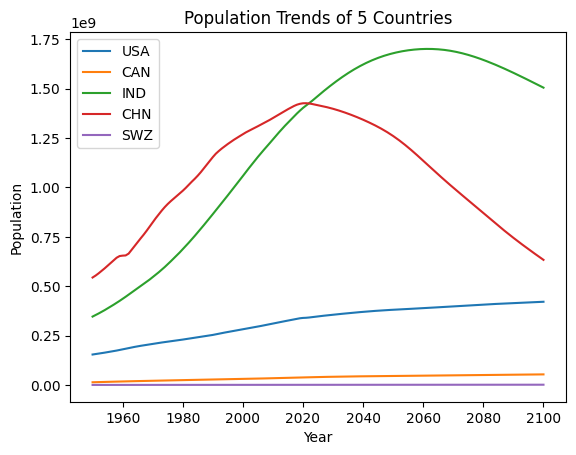

In [ ]:
countries_files = ['ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv',
                   'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-can--age--gender--year.csv',
                   'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-ind--age--gender--year.csv',
                   'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-chn--age--gender--year.csv',
                   'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-swz--age--gender--year.csv']


plt.figure() #empty plot

for i in countries_files:
    df = pd.read_csv(i)

    df_grouped = df.groupby('year')['population'].sum().reset_index() #making sure to get a single population val for each year, by summing 
    plt.plot(df_grouped['year'], df_grouped['population']) #plot each line on the same graph
    
#Labeling and annotations
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends of 5 Countries')
plt.legend(labels = ['USA', 'CAN', 'IND', 'CHN', 'SWZ'])

plt.show()



2. Investigate demographic shifts using a stacked bar chart:
   - Compare age distributions (0-14, 15-30, 31-45, 46-65, 66+) between 1950, 1985, and 2020
   - Create a stacked bar chart showing these changes
   - Calculate and display the percentage for each age group
   - Add text annotations showing key percentages
   - Include clear labels and a legend

/tmp/ipykernel_15853/3169988870.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_filtered.groupby(['year', 'bins'])['population'].sum().unstack() #sum population of each age group in each year


<Figure size 640x480 with 0 Axes>

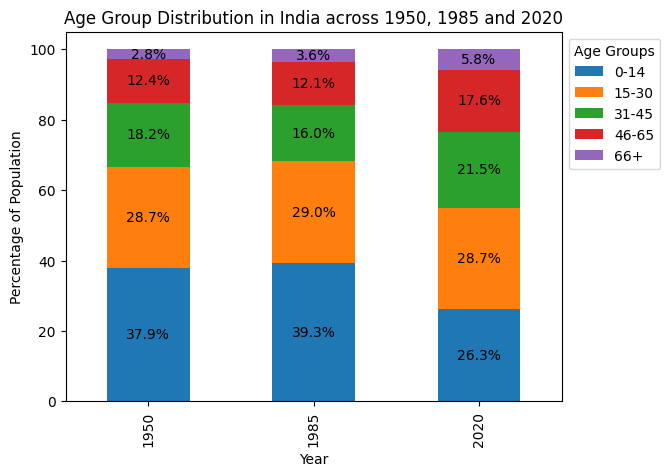

In [121]:
years = [1950, 1985, 2020] #years of choice
bins = [-1, 14, 30, 45, 65, 100] #created bins to include age of 0
labels = ['0-14', '15-30', '31-45', '46-65', '66+'] #label for each age group

df = pd.read_csv("ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-ind--age--gender--year.csv")
df['bins'] = pd.cut(df['age'], bins=bins, labels=labels) #create new col specifying which bin each observation is in

plt.figure()

df_filtered = df[df['year'].isin(years)] #only include years of choice in our dataset

df_grouped = df_filtered.groupby(['year', 'bins'])['population'].sum().unstack() #sum population of each age group in each year

df_percentage = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100 #iterate over each age group and calculate percentage

stacked_bar = df_percentage.plot(kind='bar', stacked = 'True') #create stacked bar plot

#percentage values for each part of the bar
for container in stacked_bar.containers:
    for bar in container:
        height = bar.get_height()
        stacked_bar.text(
                bar.get_x() + bar.get_width() / 2, 
                bar.get_y() + height / 2,
                f"{height:.1f}%", 
                ha='center', va='center', fontsize=10, color='black'
            )

#Labels and annotations
stacked_bar.set_xlabel('Year')
stacked_bar.set_ylabel('Percentage of Population')
stacked_bar.set_title('Age Group Distribution in India across 1950, 1985 and 2020')
plt.legend(title = 'Age Groups', bbox_to_anchor=(1,1))
plt.show()

1. Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and country for 5 countries of your choice in a specific year.
   - Use seaborn's heatmap function
   - Add clear annotations and labels
   - Write a brief explanation of what the heatmap reveals about the population structure
   
   
   EXPLANATION: Switzerland and India have a higher proportion of people aged 0-14, compared to the other countries. China, India, and Switzerland have similar proportions of people aged 15-30, with Canada and USA having a slightly lower proportion.When looking at people aged 46+, Switzerland, India, and China have a lower proportion than that of USA and Canada.

/tmp/ipykernel_15853/1534867960.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_grouped = data_filtered.groupby(['country', 'bins'])['population'].sum().unstack() #sum population of each age group by country for just 2000
/tmp/ipykernel_15853/1534867960.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = 'Percentage (%)', bbox_to_anchor=(1.3,0))


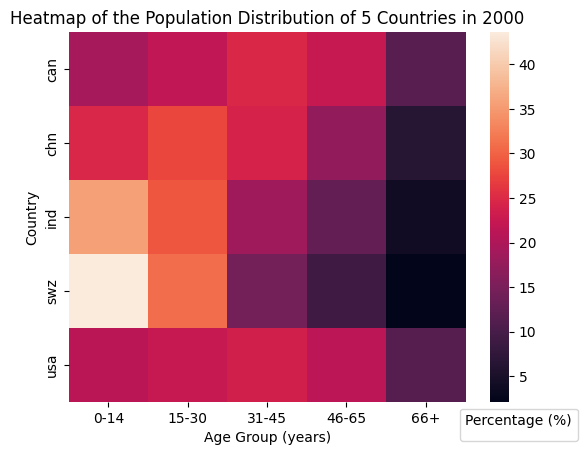

In [118]:
countries_files = ['ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv',
                   'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-can--age--gender--year.csv',
                   'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-ind--age--gender--year.csv',
                   'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-chn--age--gender--year.csv',
                   'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-swz--age--gender--year.csv']

dfs= []

for i in countries_files:
    df = pd.read_csv(i)
    dfs.append(df)

data = pd.concat(dfs, axis=0) #concatenate datasets of interest

bins = [-1, 14, 30, 45, 65, 100] #created bins to include age of 0
labels = ['0-14', '15-30', '31-45', '46-65', '66+'] #label of bins
data['bins'] = pd.cut(data['age'], bins=bins, labels=labels) #add new col with bins specified
plt.figure()

data_filtered = data[data['year'] == 2000] #year of interest

data_grouped = data_filtered.groupby(['country', 'bins'])['population'].sum().unstack() #sum population of each age group by country for just 2000

data_percentage = data_grouped.div(data_grouped.sum(axis=1), axis=0) * 100 #convert values to percentages for better readability

heat_map = sns.heatmap(data_percentage) #create the heatmap

#Labels and annotations
heat_map.set_xlabel('Age Group (years)')
heat_map.set_ylabel('Country')
heat_map.set_title('Heatmap of the Population Distribution of 5 Countries in 2000')
plt.legend(title = 'Percentage (%)', bbox_to_anchor=(1.3,0))
plt.show()








2. Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.
   - Create side-by-side violin plots using seaborn
   - Add clear labels and a title
   - Write a brief comparison of what the plots reveal

EXPLANATION: The plots reveal that the age distributions for USA and Canada are very similar across gender.

    country  gender  age  population
0       can       1    0      189807
1       can       1    1      193331
2       can       1    2      197309
3       can       1    3      201417
4       can       1    4      204893
..      ...     ...  ...         ...
399     usa       2   96       81650
400     usa       2   97       59345
401     usa       2   98       41928
402     usa       2   99       27801
403     usa       2  100       47776

[404 rows x 4 columns]


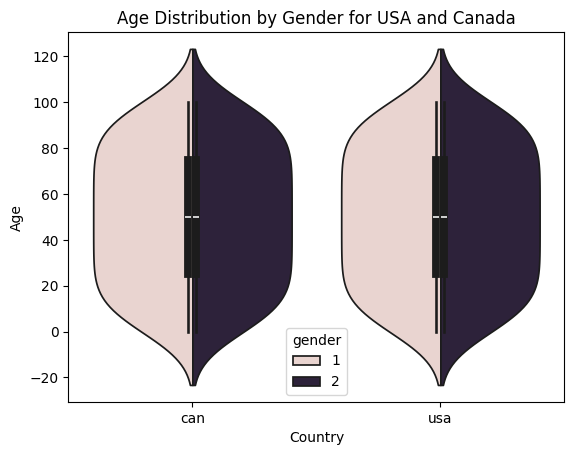

In [ ]:
countries_files = ['ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv',
                   'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-can--age--gender--year.csv']

dfs= []

for i in countries_files:
    df = pd.read_csv(i)
    dfs.append(df)

data = pd.concat(dfs, axis=0)#concatenating datasets of interest together

plt.figure()

data_filtered = data[data['year'] == 2020] #year of interest

data_grouped = data_filtered.groupby(['country', 'gender', 'age'])['population'].sum().reset_index() #sum population of each age by country and gender

sns.violinplot(x='country', y = 'age', hue ='gender', data=data_grouped, split='True') #create violinplot

plt.title('Age Distribution by Gender for USA and Canada')
plt.xlabel('Country')
plt.ylabel('Age')
plt.show()



3. Create a pairplot comparing population metrics across four countries:
   - Select four countries of your choice
   - Include all variables in the dataset
   - Use the country as the hue parameter to distinguish between countries
   - Write a brief summary of any patterns or relationships revealed by the pairplot

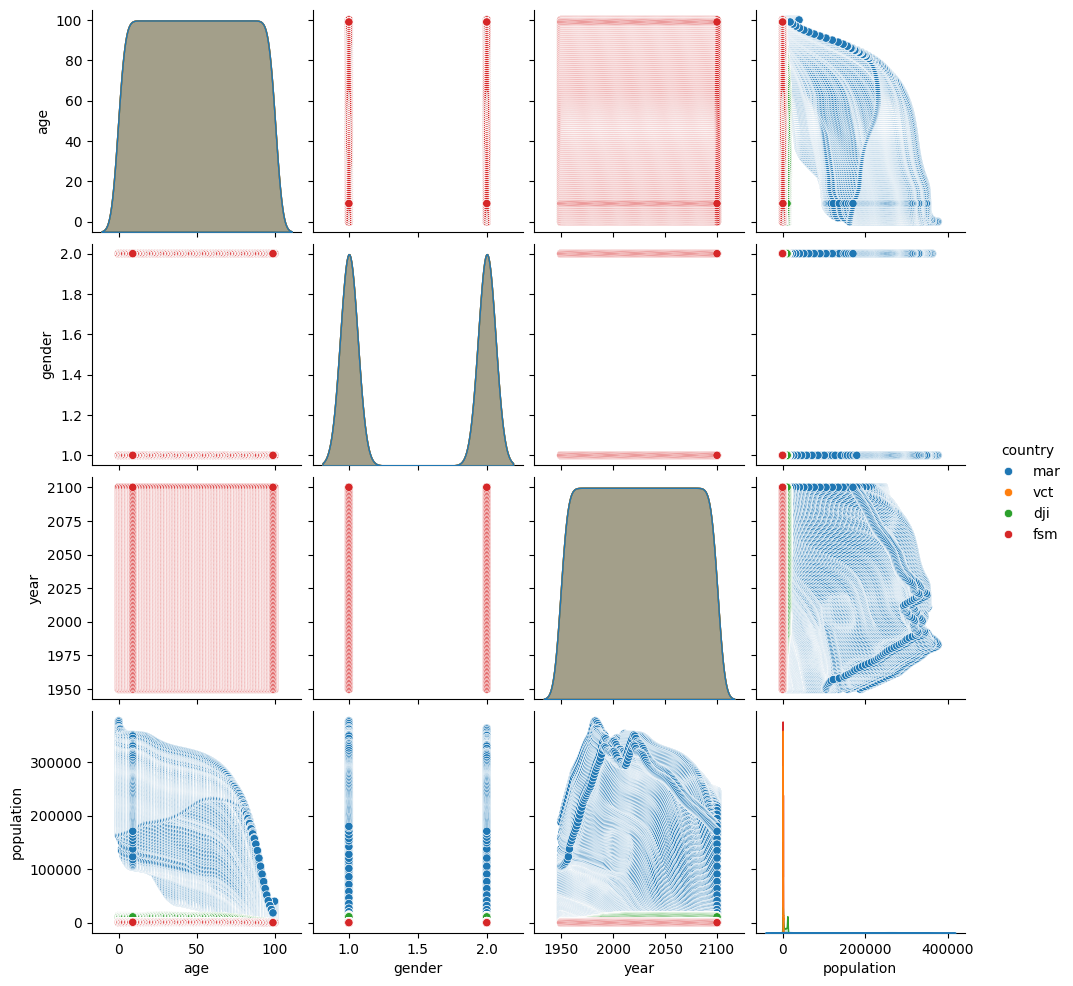

In [ ]:
countries_files = ['ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-mar--age--gender--year.csv',
                   'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-vct--age--gender--year.csv',
                   'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-dji--age--gender--year.csv',
                   'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-fsm--age--gender--year.csv']

dfs= []

for i in countries_files:
    df = pd.read_csv(i)
    dfs.append(df)

data = pd.concat(dfs, axis=0) #concatenate all datasets together

sns.pairplot(data, hue = 'country')